# Rating on Google play  store Apps

## Environment 

In [330]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1", 
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:37:09) 
[Clang 10.0.1 ]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl
import sklearn
from datetime import datetime, date
import datetime

In [3]:
mpl.rcParams['savefig.dpi'] = 500

In [4]:
df = pd.read_csv('/Users/xiongfengwang/git/local/1030project/data/googleplaystore.csv')
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Introduction

1. What is the target variable
2. Is the problem regression or classification?
3. Why is this interesting/important?
4. Number of data points and number of features.
5. If dataset is not well-documented, write a description for each feature (if feature is categorical, describe each category; if feature is numerical, include the unit of the quantity and what it measures)
6. If the dataset is from Kaggle/UCI/already described, write a short description about 2-3 public projects or publications where the data has been used, what did the authors find, what ML question did they solve and how successful they were.

This project will perform a supervised machine learning process on the Google play store Apps dataset using rating as the target variable. This is a regression problem considering that the rating scales from 1 to 5, decile between integers.<br/>
This is an interesting task because it allows us to predict the rating of an App with certain features. For the existing Apps, comparing the prediction result with the true value can assist in finding outliers with speciality. For recently developed Apps, a precise prediction result reveals the feedback in the future which saves the value of time, or at least, gives people a hint about the App's customer experience.

App: Key, the name of the App<br/>
Category: Categorical, which category the App falls into<br/>
Reviews: Numerical, number of reviews<br/>
Size: Numerical, size of the App<br/>
Installs: Categorical, scale for number of installs<br/>
Type: Categorical, whether the App is free or paid to use<br/>
Price: Numerical, price of the App<br/>
Content Rating: Categorical, rating on who can use the App<br/>
Genres: Categorical, which category & subcategory the App falls into<br/>
Last Updated: Numerical, App's last updated date in Month DD, YYYY<br/>
Current Ver: Categorical, current verison of the App<br/>
Android Ver: Categorical, Android version that supports the App<br/>
Rating: Regression Target, the rating for the App<br/>

There are plenty of public projects on this dataset, mostly focusing on EDA, data visualization, machine learning on rating prediction and data analysis. The top voted notebook analysed almost every column of the dataset except for the version ones and discussed some relationship between certain columns, for example, Users prefer to pay for apps that are light-weighted. The notebook's conclusion is neat but market-related practical. A trending notebook series plots the data with different plotting packages but just like most other visualizations, author discussed the relationship between rating and one feature individually. The top voted machine learning notebook provides integer encoding RFR model, dummy encoding SVR model and random forest regressor model but cannot conclude which model has the best predictive.

## Exploratory Data Analysis

1. Perform a thorough EDA on each column in your dataset and pay special attention to your target variable
2. Use .describe or .value_counts, create histograms or bar plots as appropriate
3. Create other type of figures using two columns
4. Create a scatter matrix
5. There is no need to include everything in the report.
6. Choose at least three but maximum five figures that you think are interesting or important and one of those figures should show the target variable. Do not include three figures of the same type (e.g., you’ll lose points if you submit three bar plots). Use at least two figure types.
7. Write a figure caption for each figure.
8. Make sure your figures are publication-quality figures. Please print out your report before you submit it and make sure the figures are readable, the font size is similar to the text font size, axes are labelled, the figures have sufficient resolution (usually 300 dpi).

In [5]:
# drop completely duplicated rows
df2 = df.drop_duplicates()
df2.shape

(10358, 13)

In [6]:
# drop rows with no target variable rating
# First round EDA based on this df, figures in 8893 samples folder
df2 = df2.dropna(subset = ['Rating'])
df2.shape

(8893, 13)

We have ‘almost duplicate’ samples which are identical except for the nuance in the reviews feature. In the second round of EDA, I removed them by only keep the sample with highest number of reviews grouping by app name and genres. Genres is necessary because same App can have totally different data if they have different genres, meaning the data come in different updates, see ‘Bubble Shooter’. We have 8211 samples left.

In [7]:
# Decision after first round EDA
# Similar samples need to be dropped
# keep sample with unique app-genres
# remove duplicate with nuance difference in Reviews
reviews_maxes = df2.groupby(['App', 'Genres']).Reviews.transform(max)
df1 = df2.loc[df2.Reviews == reviews_maxes]
df1.shape

(8211, 13)

In [12]:
# csv check
# df1.sort_values('Reviews').drop_duplicates(subset=['App', 'Genres'], keep='last').to_csv('all_data1.csv', index = False)
# df2.sort_values(by='App', ascending=False).head(100)
# df1.to_csv('/Users/xiongfengwang/git/local/1030project/data/df1.csv', index = False)

In [9]:
# drop rows with Nan
# df1.dropna(inplace = True)

In [10]:
# reset index
df1 = df1.reset_index(drop=True)

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8211 entries, 0 to 8210
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8211 non-null   object 
 1   Category        8211 non-null   object 
 2   Rating          8211 non-null   float64
 3   Reviews         8211 non-null   int64  
 4   Size            7040 non-null   float64
 5   Installs        8211 non-null   object 
 6   Type            8211 non-null   object 
 7   Price           8211 non-null   float64
 8   Content Rating  8211 non-null   object 
 9   Genres          8211 non-null   object 
 10  Last Updated    8211 non-null   object 
 11  Current Ver     8207 non-null   object 
 12  Android Ver     8211 non-null   object 
 13  Subcategory     383 non-null    object 
 14  Days            8211 non-null   int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 962.4+ KB


### data modify log
data sample 10474's column replacement is wrong, I modified it by hand.

#### Catogery 

In [13]:
df1.Category.value_counts()

FAMILY                 1656
GAME                    900
TOOLS                   721
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         298
MEDICAL                 291
PHOTOGRAPHY             263
BUSINESS                263
SPORTS                  260
COMMUNICATION           257
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                181
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           150
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               106
FOOD_AND_DRINK           94
ENTERTAINMENT            87
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           59
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

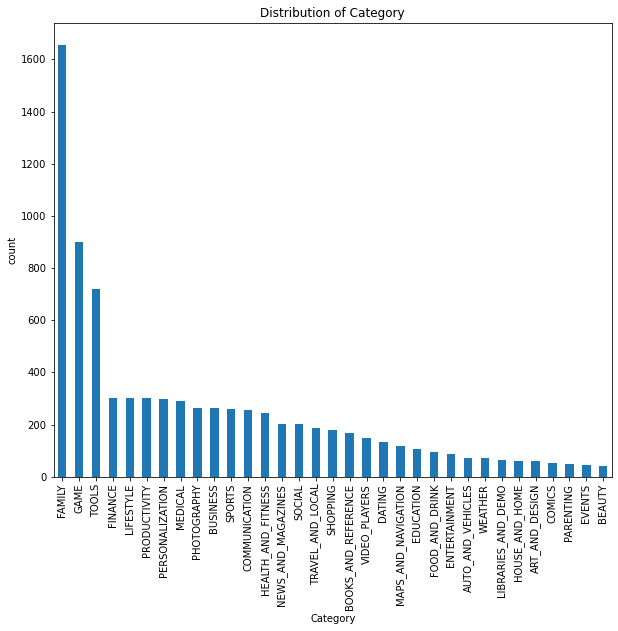

In [14]:
plt.figure(figsize=(10, 10))
pd.value_counts(df1.Category).plot.bar(title = 'Distribution of Category')
plt.gcf().subplots_adjust(bottom=0.25)
plt.xlabel('Category')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Category.png', inches = 'tight')

#### Reviews

In [15]:
df1.Reviews.describe()

count    8.211000e+03
mean     2.551187e+05
std      1.983915e+06
min      1.000000e+00
25%      1.270000e+02
50%      3.031000e+03
75%      4.406650e+04
max      7.815831e+07
Name: Reviews, dtype: float64

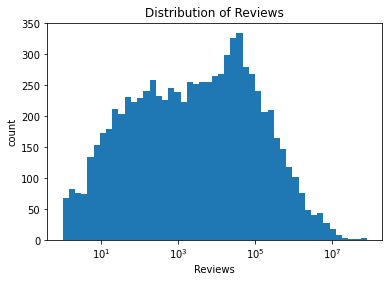

In [16]:
df1.Reviews.plot.hist(bins = np.logspace(np.log10(1),np.log10(np.max(df1.Reviews)),50))
plt.title('Distribution of Reviews')
plt.semilogx()
plt.xlabel('Reviews')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Reviews.png')

#### Size

In [200]:
df1.Size = df1.Size.replace('Varies with device', np.nan)

In [18]:
df1.Size = df1.Size.str.replace('k','e+3')
df1.Size = df1.Size.str.replace('M','e+6')

In [19]:
df1.Size = pd.to_numeric(df1.Size)
df1.Size.describe()

count    7.040000e+03
mean     2.175141e+07
std      2.271448e+07
min      8.500000e+03
25%      4.900000e+06
50%      1.300000e+07
75%      3.100000e+07
max      1.000000e+08
Name: Size, dtype: float64

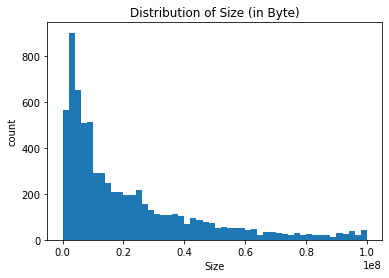

In [20]:
df1.Size.plot.hist(bins = 50)
plt.title('Distribution of Size (in Byte)')
plt.xlabel('Size')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Size.png')

#### Installs

In [21]:
df1.Installs.value_counts()

1,000,000+        1418
100,000+          1097
10,000+            987
10,000,000+        940
1,000+             698
5,000,000+         611
500,000+           503
50,000+            457
5,000+             425
100+               302
50,000,000+        204
500+               199
100,000,000+       189
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

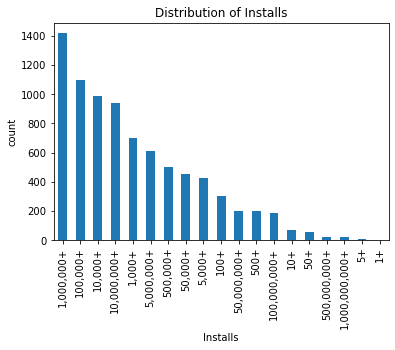

In [22]:
pd.value_counts(df1.Installs).plot.bar(title = 'Distribution of Installs')
plt.xlabel('Installs')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Installs.png')

#### Type

In [23]:
df1.Type.value_counts()

Free    7607
Paid     604
Name: Type, dtype: int64

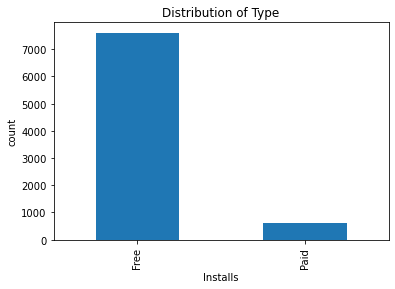

In [24]:
pd.value_counts(df1.Type).plot.bar(title = 'Distribution of Type')
plt.xlabel('Installs')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Type.png')

#### Price

In [25]:
df1.Price = df1.Price.str.replace('$','')

In [26]:
df1.Price = pd.to_numeric(df1.Price)

In [27]:
df1.Price.describe()

count    8211.000000
mean        1.035136
std        16.842105
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

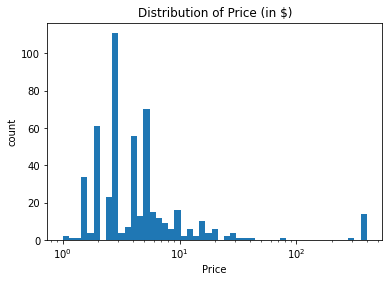

In [28]:
df1.Price.plot.hist(bins = np.logspace(np.log10(1),np.log10(np.max(df1.Price)),50))
plt.title('Distribution of Price (in $)')
plt.semilogx()
plt.xlabel('Price')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Price.png')

#### Content Rating

In [29]:
df1['Content Rating'].value_counts()

Everyone           6632
Teen                913
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

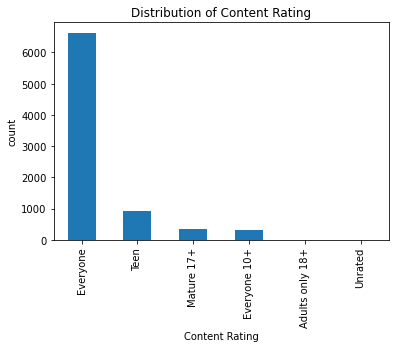

In [30]:
pd.value_counts(df1['Content Rating']).plot.bar(title = 'Distribution of Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Content Rating.png')

#### Genres
Data in thie feature looks good but is hard to plot
##### @Todo
For this feature I'm considering take the subcategory apart

In [31]:
df1.Genres.value_counts()

Tools                                 720
Entertainment                         472
Education                             430
Finance                               302
Productivity                          301
                                     ... 
Role Playing;Brain Games                1
Card;Brain Games                        1
Tools;Education                         1
Parenting;Brain Games                   1
Video Players & Editors;Creativity      1
Name: Genres, Length: 115, dtype: int64

In [32]:
df1['Subcategory'] = df1.Genres.str.split(';').str[1]

In [33]:
grouped_category = df1.groupby(['Category','Subcategory']);

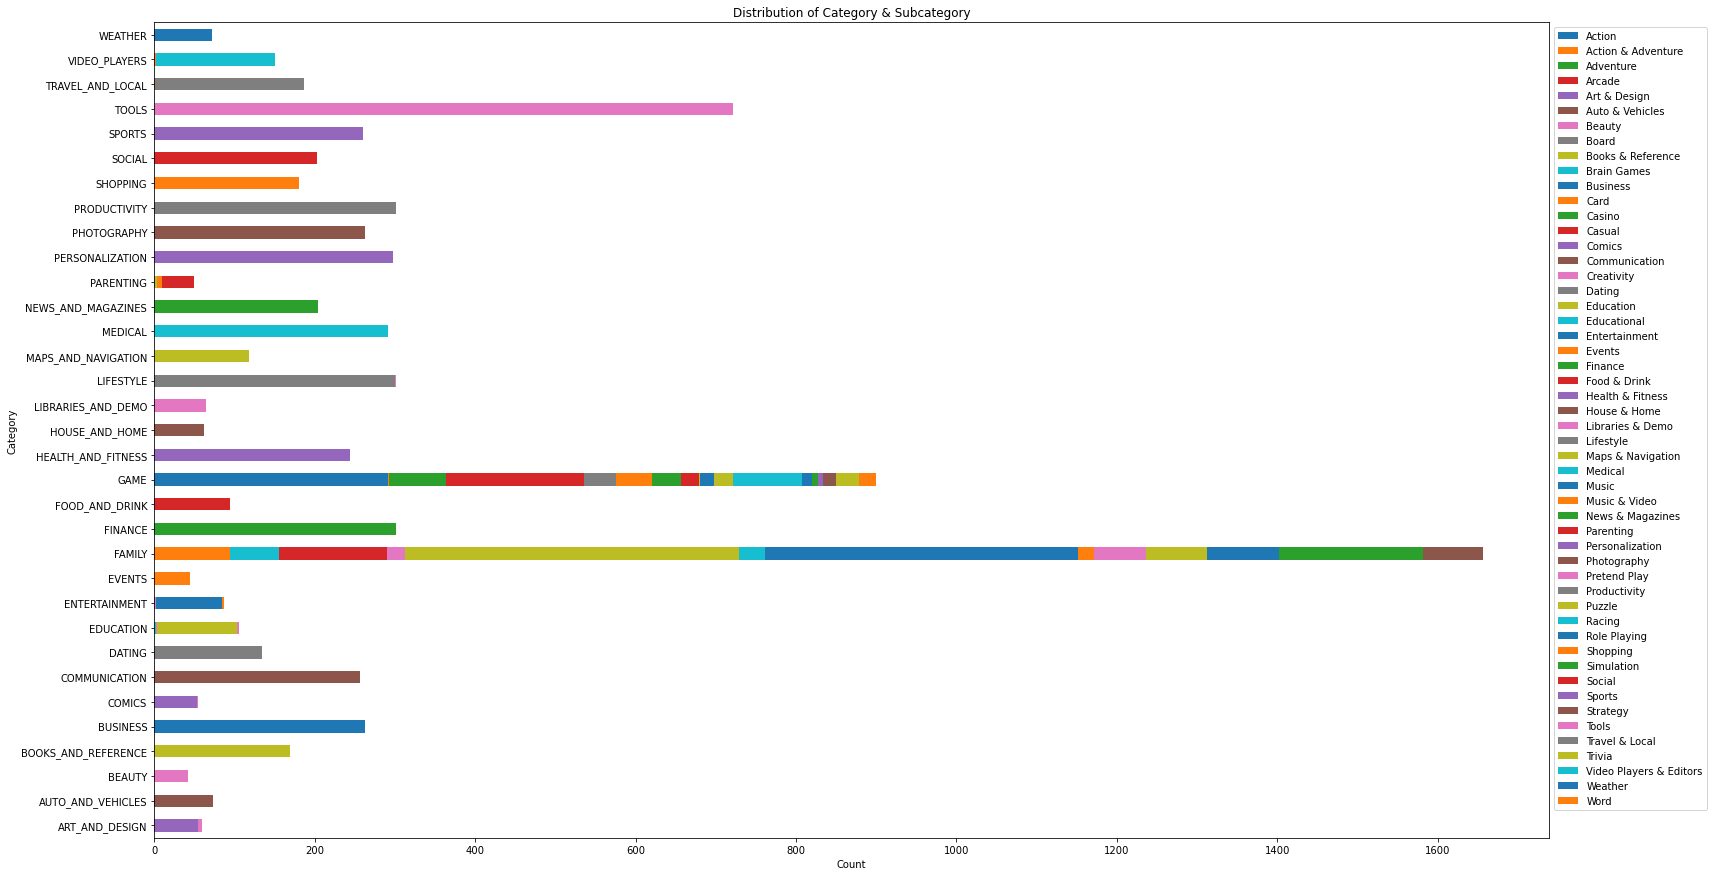

In [34]:
twowaytable = pd.crosstab(index = df1.Category,\
                          columns = df1.Genres.str.split(';').str[-1])
twowaytable.plot(kind = "barh", figsize = (25, 15), stacked = True)
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.xlabel('Count')
plt.title('Distribution of Category & Subcategory')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Category & Subcategory.png')

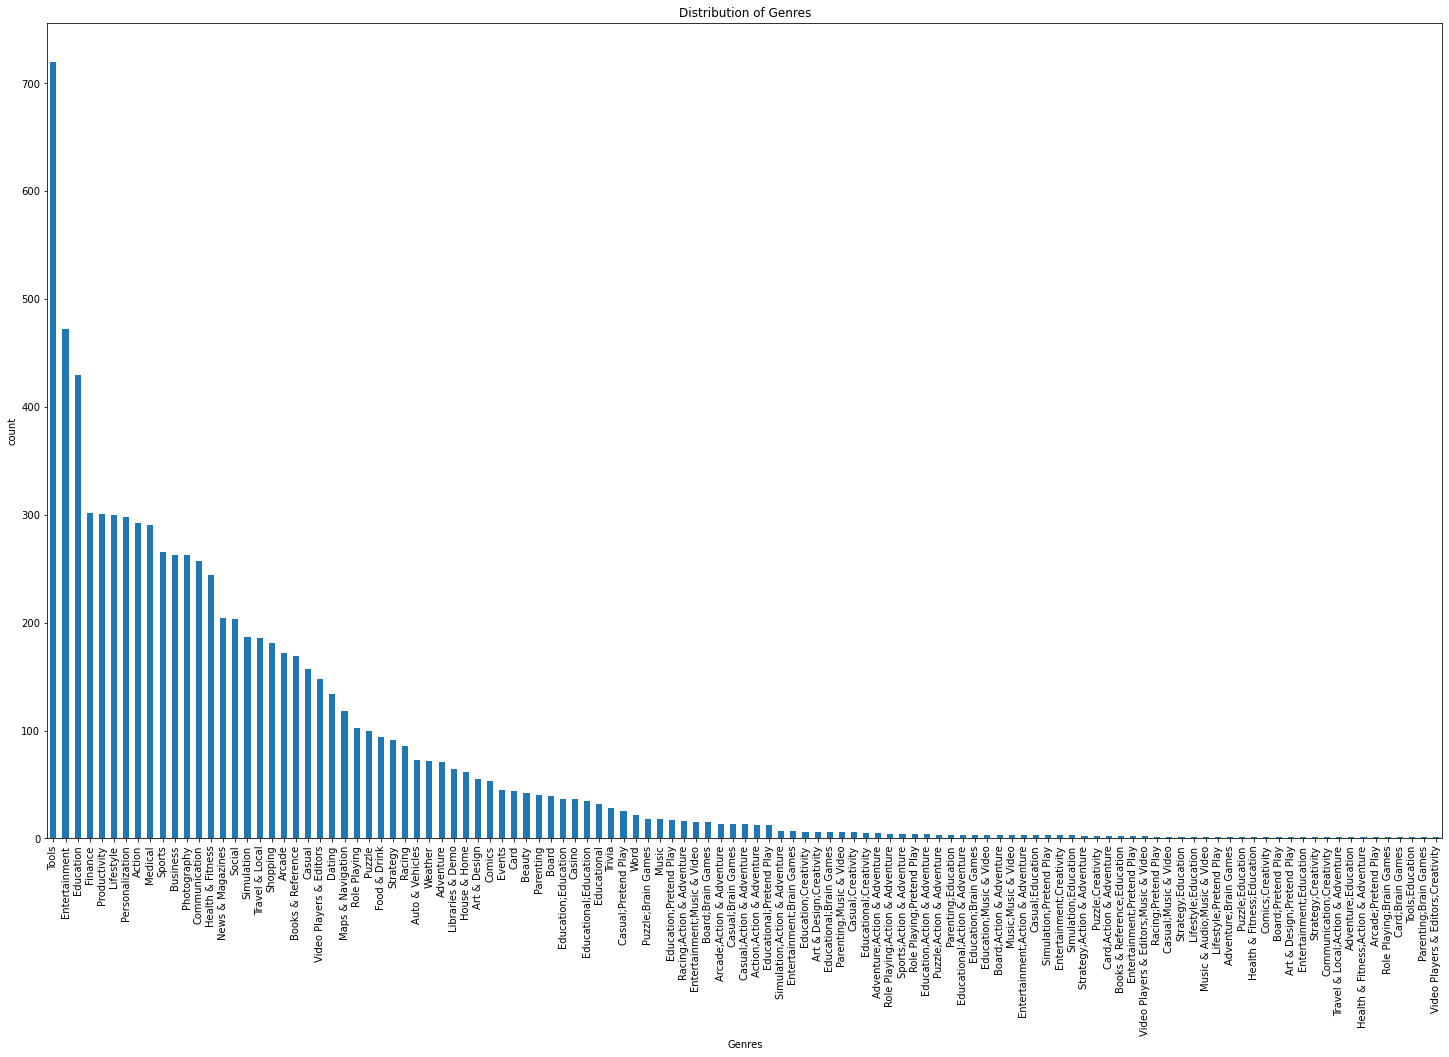

In [37]:
# This is just to show we cannot plot Genres directly
pd.value_counts(df1.Genres).plot.bar(title = 'Distribution of Genres',
                                    figsize = (25, 15));
plt.xlabel('Genres');
plt.ylabel('count');
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Genres.png')

#### Last Updated
##### @Todo
For this feature I'm considering take the Month apart as a new feature

In [38]:
(datetime.datetime.strptime('2019-02-03', '%Y-%m-%d')- pd.to_datetime(df1['Last Updated']))[24].days;

In [39]:
datetime_confuse = datetime.datetime.strptime('2019-02-03', '%Y-%m-%d') - pd.to_datetime(df1['Last Updated'])
df1['Days'] = ''
for i in range(len(df1['Last Updated'])):
    df1['Days'][i] = pd.to_numeric(datetime_confuse[i].days)
df1.Days = pd.to_numeric(df1.Days)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
df1.Days.describe()

count    8211.000000
mean      454.464986
std       411.108981
min       179.000000
25%       199.000000
50%       259.000000
75%       535.000000
max      3180.000000
Name: Days, dtype: float64

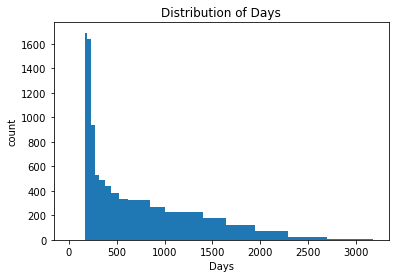

In [41]:
df1.Days.plot.hist(bins = np.logspace(np.log10(1),np.log10(np.max(df1.Days)),50))
plt.title('Distribution of Days')
plt.xlabel('Days')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Days.png')

#### Current Ver
##### @Pass

#### Android Ver

Small amount of samples show different format. No modification.

In [60]:
df1['Android Ver'].fillna('None', inplace=True)

In [62]:
df1['Android Ver'].value_counts()

4.1 and up            1818
4.0.3 and up          1141
4.0 and up            1046
Varies with device     948
4.4 and up             714
2.3 and up             548
5.0 and up             448
4.2 and up             316
2.3.3 and up           232
2.2 and up             203
3.0 and up             200
4.3 and up             186
2.1 and up             112
1.6 and up              87
6.0 and up              42
7.0 and up              41
3.2 and up              31
2.0 and up              27
1.5 and up              16
5.1 and up              16
3.1 and up               8
2.0.1 and up             7
8.0 and up               5
4.4W and up              5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
None                     2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

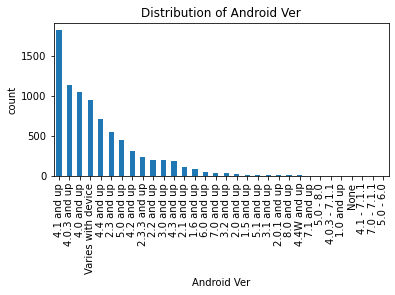

In [63]:
pd.value_counts(df1['Android Ver']).plot.bar(title = 'Distribution of Android Ver')
plt.gcf().subplots_adjust(bottom=0.35)
plt.xlabel('Android Ver')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Android Ver.png')

#### Rating

In [45]:
df1.Rating.value_counts();

In [46]:
df1.Rating.describe()

count    8211.000000
mean        4.173426
std         0.536236
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [47]:
len(df1.Rating.unique())

39

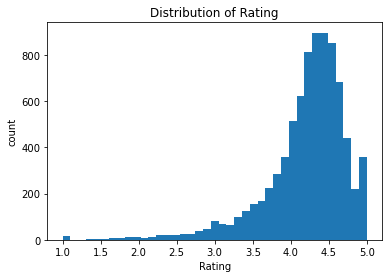

In [48]:
df1.Rating.plot.hist(bins = 39)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('count')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Distribution of Rating.png')

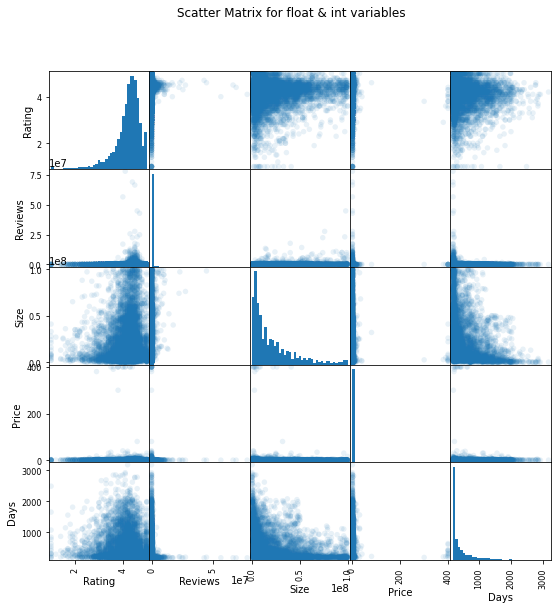

In [49]:
pd.plotting.scatter_matrix(df1.select_dtypes([float, int]), figsize = (9, 9), marker = 'o',
                           hist_kwds = {'bins': 39}, s = 30, alpha = .1)
plt.suptitle('Scatter Matrix for float & int variables')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Scatter Matrix.png')

invalid value encountered in greater_equal
invalid value encountered in less_equal


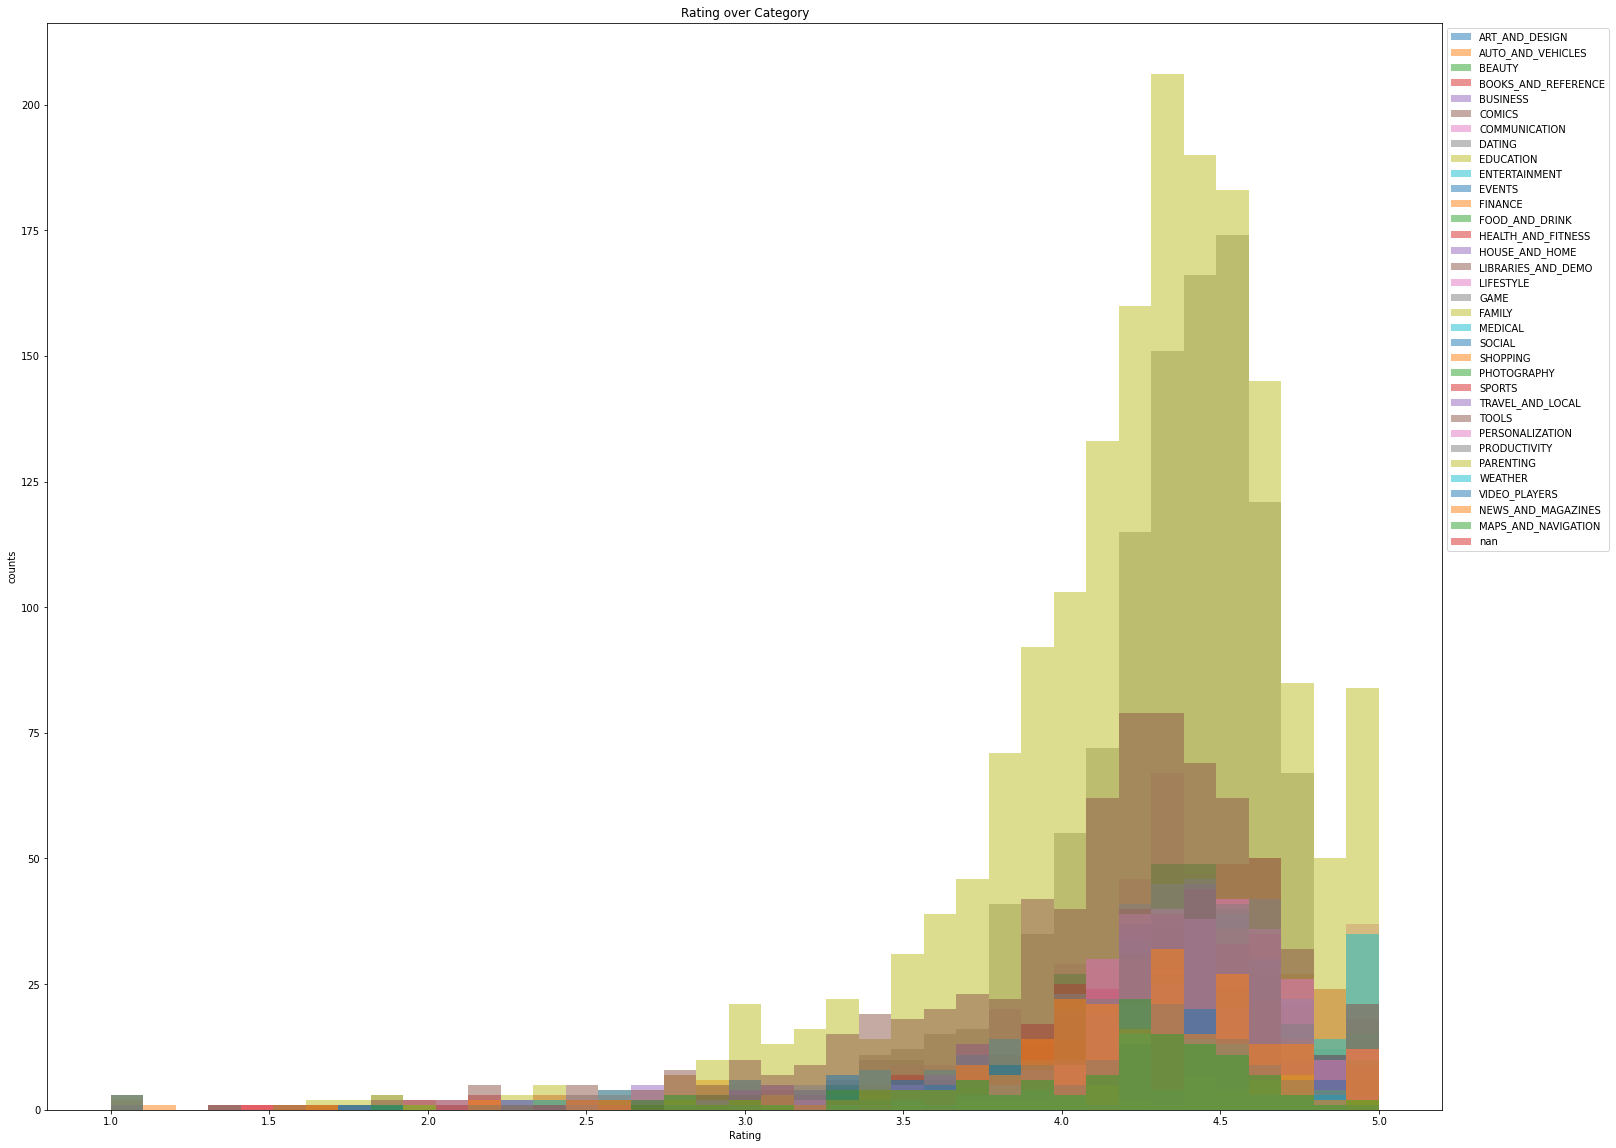

In [50]:
plt.figure(figsize=(25, 20))
categories = df['Category'].unique()
bin_range = (df['Rating'].min(),df['Rating'].max())
for i in categories:
    plt.hist(df[df['Category']==i]['Rating'],alpha=0.5,label=i,range=bin_range,bins=39)
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.ylabel('counts')
plt.xlabel('Rating')
plt.title('Rating over Category')
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/Rating over Category.png')

## Data Processing

1. Discuss how you split the dataset and why.
2. Is your dataset IID?
3. Does it have group structure?
4. Is it a time series data?
5. How should you split the dataset given your ML question to best mimic future use when you deploy the model?
6. Apply MinMaxEncoder or StandardScaler on the continuous features
7. Apply OneHotEncoder or OrdinalEncoder on categorical features
8. Apply the LabelEncoder on the target variable if necessary.
9. Describe why you chose the preprocessor you used for each feature.
10. How many features do you have in the preprocessed data?

This is not an IID dataset because clearly there are group structures in the dataset: Category and Subcategory. Also this is not a time series dataset because even though for very small amout of Apps, there are samples for different version of it and the rating might vary, the porpotion is too small to be consider as a generl feature. Most of the Apps with different version only differ in number of reviews by around 1%.<br/>
Considering there are 8211 samples with a valid target features, the size of the data set is fair to apply a 8-1-1 split. Category with lowest counts is 42 for Beauty, 9 catogories' count below 100, and only 2 catogries' count above 800, so the 8-1-1 split is rational becasue we don't need to worry about group in train/test set should not apear in the other. We can implement plenty of n_split on the dataset.<br/>
Since there's an obvious group structure, I will choose GroupShuffleSplit to split the dataset. I choose GroupShuffleSplit over GroupKFold because the data set is also imbalance as we can see from the distribution of catrgories, or some other features. 

App: Key, no encoding<br/>
Category: Categorical, OneHotEncoder<br/>
Reviews: Numerical, StandardScaler<br/>
Size: Numerical, StandardScaler<br/>
Installs: Categorical, OrdinalEncoder<br/>
Type: Categorical, OneHotEncoder<br/>
Price: Numerical, StandardScaler<br/>
Content Rating: Categorical, OneHotEncoder<br/>
Genres: Categorical, OneHotEncoder<br/>
Last Updated: Numerical,dropped for new feature<br/>
Current Ver: Categorical, dropped<br/>
Android Ver: Categorical, OneHotEncoder<br/>
Subcategory: Categorical, OneHotEncoder, on hold<br/>
Days: numerical, StandardScaler<br/>
Rating: Regression Target, no encoding<br/>

In [201]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8211 entries, 0 to 8210
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8211 non-null   object 
 1   Category        8211 non-null   object 
 2   Rating          8211 non-null   float64
 3   Reviews         8211 non-null   int64  
 4   Size            7040 non-null   float64
 5   Installs        8211 non-null   object 
 6   Type            8211 non-null   object 
 7   Price           8211 non-null   float64
 8   Content Rating  8211 non-null   object 
 9   Genres          8211 non-null   object 
 10  Last Updated    8211 non-null   object 
 11  Current Ver     8207 non-null   object 
 12  Android Ver     8211 non-null   object 
 13  Subcategory     383 non-null    object 
 14  Days            8211 non-null   int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 962.4+ KB


In [65]:
# csv check
df1.to_csv('/Users/xiongfengwang/git/local/1030project/data/df1_2.csv', index = False)

In [202]:
y = pd.DataFrame(df1['Rating'])
X = df1.drop(['App', 'Rating', 'Subcategory', 'Last Updated', 'Current Ver'], axis = 1)

In [203]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8211 entries, 0 to 8210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8211 non-null   object 
 1   Reviews         8211 non-null   int64  
 2   Size            7040 non-null   float64
 3   Installs        8211 non-null   object 
 4   Type            8211 non-null   object 
 5   Price           8211 non-null   float64
 6   Content Rating  8211 non-null   object 
 7   Genres          8211 non-null   object 
 8   Android Ver     8211 non-null   object 
 9   Days            8211 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 641.6+ KB


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GroupShuffleSplit

In [125]:
# init
test_scores = []
best_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)

    #preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
#     print(X_train_prep[0:5]

    print("==========================================================")
#     print('training set:', y_train.shape)
#     print('training_prep set:', y_train.shape)
# #     print(y_train_prep[0:5])
#     print("==========================================================")
    

======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)
======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)
======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)
======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)
======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)
======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)
======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)
======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)
======================random state 8======================
training set: (7226, 

## Missing values

In [136]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [241]:
imp_mean = IterativeImputer(random_state=0)
temp = []
temp1 = []
for i in range(len(X)):
    temp.append([X.iloc[i].Size, X.iloc[i].Days])
imp_mean.fit(temp)
temp = imp_mean.transform(temp)
temp
for i in range(len(temp)):
    temp1.append(temp[i][0])
print(len(temp1))

8211


In [126]:
X.isnull().sum()
# df1.Subcategory.isnull().sum()

Category             0
Reviews              0
Size              1171
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Android Ver          0
Days                 0
dtype: int64

In [127]:
X.dtypes

Category           object
Reviews             int64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Android Ver        object
Days                int64
dtype: object

In [128]:
X['Size'].fillna(float('nan'), inplace=True)

In [129]:
type(X.iloc[48].Size)

numpy.float64

In [189]:
X_train['Size']

3        2800000.0
8        3100000.0
24      25000000.0
39       1200000.0
45      25000000.0
           ...    
8203     2300000.0
8204      582000.0
8205      619000.0
8209           NaN
8210    19000000.0
Name: Size, Length: 6828, dtype: float64

In [171]:
X_train.Size

pandas.core.series.Series

## Models

In [335]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8211 entries, 0 to 8210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8211 non-null   object 
 1   Reviews         8211 non-null   int64  
 2   Size            7040 non-null   float64
 3   Installs        8211 non-null   object 
 4   Type            8211 non-null   object 
 5   Price           8211 non-null   float64
 6   Content Rating  8211 non-null   object 
 7   Genres          8211 non-null   object 
 8   Android Ver     8211 non-null   object 
 9   Days            8211 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 641.6+ KB


In [412]:
# init
m_score = []
s_score = []

In [362]:
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
import pickle
from joblib import dump, load

### Linear Regression

In [403]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
    reg = LinearRegression()
    

    reg.fit(X_train_prep, y_train)
    models.append(reg)
    y_train_pred = reg.predict(X_train_prep)
    train_score.append(mean_squared_error(y_train,y_train_pred))
    y_val_pred = reg.predict(X_val_prep)
    val_score.append(mean_squared_error(y_val,y_val_pred))

    
#     print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)
corresponding validation score: 1.0004757577004913e+20
test score: 2.0458932671050636e+20



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)
corresponding validation score: 7.382130743370326e+18
test score: 1.0375388189357806e+19



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)
corresponding validation score: 2.0168774187117804e+18
test score: 8.475118717536008e+18



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)
corresponding validation score: 1.4224322995508517e+20
test score: 3.797551617398573e+19



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)
corresponding validation score: 1.454386789057171e+17
test score: 1.4204348307939916e+19



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)
corresponding validation score: 8.639975292219938e+19
test score: 4.940384543803048e+20



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)
corresponding validation score: 4.748058684478912e+20
test score: 9.53374448432582e+20



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)
corresponding validation score: 2.006141461748925e+19
test score: 3.2475442618182885e+19



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 8======================
training set: (7226, 10)
training_prep set: (7226, 168)
corresponding validation score: 1.5293111777914033e+18
test score: 4.784541455764038e+19



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 9======================
training set: (6569, 10)
training_prep set: (6569, 165)
corresponding validation score: 5.98982815288973e+20
test score: 8.535072133897904e+20



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [365]:
dump(reg, '/Users/xiongfengwang/git/local/1030project/results/LR.joblib')

['/Users/xiongfengwang/git/local/1030project/results/LR.joblib']

In [404]:
np.mean(test_scores)

2.656860671477826e+20

In [357]:
m_score.append(np.mean(test_scores))
s_score.append(np.std(test_scores))

In [405]:
m_score

[0.3092539131336592,
 0.3023113954831187,
 0.3092539131336592,
 0.28988752913386095,
 0.310398551698937,
 0.35127826418821123,
 2.656860671477826e+20]

### Lasso

In [419]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
    
    
    param_grid = {'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = Lasso(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 523.8587982413915, tolerance: 0.19069148974809627


best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.32706595247845816
test score: 0.2852359865357856



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 513.6160695985828, tolerance: 0.17422547057845733


best model parameters: {'alpha': 0.001}
corresponding validation score: 0.3138119696602776
test score: 0.19929475219227372



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 595.6270813444455, tolerance: 0.2030485456671053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.308202823829561, tolerance: 0.2030485456671053


best model parameters: {'alpha': 0.001}
corresponding validation score: 0.12420015851021149
test score: 0.2794874347814573



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.4634302904567, tolerance: 0.20419213780767023
Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.167491914293578, tolerance: 0.20419213780767023


best model parameters: {'alpha': 0.01}
corresponding validation score: 0.2536630608204133
test score: 0.254582532717992



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.9529067696359, tolerance: 0.17338092696108717
Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.457776304667505, tolerance: 0.17338092696108717


best model parameters: {'alpha': 0.01}
corresponding validation score: 0.2607493234583665
test score: 0.44428067586960535



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 348.1698399955411, tolerance: 0.20217907696597892


best model parameters: {'alpha': 1e-06}
corresponding validation score: 0.33096045608793206
test score: 0.2919125567778349



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.44828924516696, tolerance: 0.17889060912314617
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.306851131156918, tolerance: 0.17889060912314617


best model parameters: {'alpha': 0.001}
corresponding validation score: 0.2512511752803396
test score: 0.30379369078394997



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 430.4451698075251, tolerance: 0.1961597549977453


best model parameters: {'alpha': 0.0001}
corresponding validation score: 0.3448534418744244
test score: 0.1965000544117647



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 8======================
training set: (7226, 10)
training_prep set: (7226, 168)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.405554983754, tolerance: 0.20336681829504527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.437404135553834, tolerance: 0.20336681829504527


best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.3089984299843162
test score: 0.3227503185791852



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 9======================
training set: (6569, 10)
training_prep set: (6569, 165)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.298639655123, tolerance: 0.1774635603592631
Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.564704140908361, tolerance: 0.1774635603592631


best model parameters: {'alpha': 0.001}
corresponding validation score: 0.25214752711553917
test score: 0.42712595478956905


In [373]:
dump(Lasso(alpha = 1e-15), '/Users/xiongfengwang/git/local/1030project/results/Lasso.joblib')

['/Users/xiongfengwang/git/local/1030project/results/Lasso.joblib']

In [421]:
np.mean(test_scores)

0.3004963957439418

In [400]:
np.mean(test_scores)

0.30239363576246814

In [410]:
final_models

[Lasso(alpha=1e-05),
 Lasso(alpha=0.1),
 Lasso(alpha=1e-10),
 Lasso(alpha=1e-10),
 Lasso(alpha=1e-10),
 Lasso(alpha=1e-05),
 Lasso(alpha=0.1),
 Lasso(alpha=1e-05),
 Lasso(alpha=1e-05),
 Lasso(alpha=0.1)]

In [415]:
m_score.append(np.mean(test_scores))
s_score.append(np.std(test_scores))

In [416]:
m_score

[0.3067878485647559]

### Ridge

In [418]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #

    
    param_grid = {'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = Ridge(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)
best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.3281603303463166
test score: 0.29770738998632384



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)
best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.3795061490823772
test score: 0.20161686557136146



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)
best model parameters: {'alpha': 1e-10}
corresponding validation score: 0.1380229309557228
test score: 0.2830386387356574



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)
best model parameters: {'alpha': 1e-10}
corresponding validation score: 0.25788151896433165
test score: 0.2704982864333851



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)
best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.27282104310736427
test score: 0.43629223189287647



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)
best model parameters: {'alpha': 1e-10}
corresponding validation score: 0.3296805649191062
test score: 0.2958212037969291



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)
best model parameters: {'alpha': 1e-10}
corresponding validation score: 0.2738777086407698
test score: 0.30830890950288453



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)
best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.34294473697194006
test score: 0.19982893224550743



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 8======================
training set: (7226, 10)
training_prep set: (7226, 168)
best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.308099153777196
test score: 0.324408697089306



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 9======================
training set: (6569, 10)
training_prep set: (6569, 165)
best model parameters: {'alpha': 1e-05}
corresponding validation score: 0.26385067608700247
test score: 0.42934780655374866



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [378]:
dump(Ridge(alpha = 1e-15), '/Users/xiongfengwang/git/local/1030project/results/Ridge.joblib')

['/Users/xiongfengwang/git/local/1030project/results/Ridge.joblib']

In [304]:
m_score.append(np.mean(test_scores))
s_score.append(np.std(test_scores))

### Enet

In [424]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
#     reg = ElasticNet()
    
    param_grid = {'alpha': [1e-10, 1e-5, 1e-3, 1e-1],
             'l1_ratio': [0.1, 0.3, 0.5]}

    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = ElasticNet(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 873.5961050698252, tolerance: 0.19069148974809627
Objective did not converge. You might want to increase the number of iterations. Duality gap: 872.2990232585023, tolerance: 0.19069148974809627
Objective did not converge. You might want to increase the number of iterations. Duality gap: 871.0031679565652, tolerance: 0.19069148974809627
Objective did not converge. You might want to increase the number of iterations. Duality gap: 279.5744668003914, tolerance: 0.19069148974809627
Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.47321059678484, tolerance: 0.19069148974809627
Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.964810259823935, tolerance: 0.19069148974809627


best model parameters: {'l1_ratio': 0.5, 'alpha': 1e-05}
corresponding validation score: 0.3272711609096717
test score: 0.29203692863507974



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 801.7065110189869, tolerance: 0.17422547057845733
Objective did not converge. You might want to increase the number of iterations. Duality gap: 801.4808746469615, tolerance: 0.17422547057845733
Objective did not converge. You might want to increase the number of iterations. Duality gap: 801.2552780637265, tolerance: 0.17422547057845733
Objective did not converge. You might want to increase the number of iterations. Duality gap: 356.5216051696792, tolerance: 0.17422547057845733
Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.592499086382986, tolerance: 0.17422547057845733
Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.431311280426826, tolerance: 0.17422547057845733


best model parameters: {'l1_ratio': 0.5, 'alpha': 0.001}
corresponding validation score: 0.31458892323824905
test score: 0.19898521064404717



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 814.433450812077, tolerance: 0.2030485456671053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 744.5192040156526, tolerance: 0.2030485456671053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 719.3135769043867, tolerance: 0.2030485456671053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 435.0874899550058, tolerance: 0.2030485456671053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.108080586435335, tolerance: 0.2030485456671053
Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.70507162796548, tolerance: 0.2030485456671053


best model parameters: {'l1_ratio': 0.5, 'alpha': 0.001}
corresponding validation score: 0.1251820885654652
test score: 0.2796000541213336



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.4725535794297, tolerance: 0.20419213780767023
Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.76736402249037, tolerance: 0.20419213780767023
Objective did not converge. You might want to increase the number of iterations. Duality gap: 340.11528338160997, tolerance: 0.20419213780767023
Objective did not converge. You might want to increase the number of iterations. Duality gap: 492.316807615935, tolerance: 0.20419213780767023
Objective did not converge. You might want to increase the number of iterations. Duality gap: 162.63512914527632, tolerance: 0.20419213780767023
Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.447898849557305, tolerance: 0.20419213780767023


best model parameters: {'l1_ratio': 0.1, 'alpha': 0.1}
corresponding validation score: 0.25408109170900756
test score: 0.2548674332403817



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.2058534183542, tolerance: 0.17338092696108717
Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.1880088548074, tolerance: 0.17338092696108717
Objective did not converge. You might want to increase the number of iterations. Duality gap: 788.1714152800507, tolerance: 0.17338092696108717
Objective did not converge. You might want to increase the number of iterations. Duality gap: 396.0633870057569, tolerance: 0.17338092696108717
Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.35390901629421, tolerance: 0.17338092696108717
Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.344051943702652, tolerance: 0.17338092696108717


best model parameters: {'l1_ratio': 0.1, 'alpha': 0.1}
corresponding validation score: 0.260714217060003
test score: 0.4443710332783977



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 817.9914884498496, tolerance: 0.20217907696597892
Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.9975654663706, tolerance: 0.20217907696597892
Objective did not converge. You might want to increase the number of iterations. Duality gap: 704.741585260382, tolerance: 0.20217907696597892
Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.27807984420633, tolerance: 0.20217907696597892
Objective did not converge. You might want to increase the number of iterations. Duality gap: 133.41285295163516, tolerance: 0.20217907696597892
Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.90108155370922, tolerance: 0.20217907696597892


best model parameters: {'l1_ratio': 0.3, 'alpha': 1e-05}
corresponding validation score: 0.329685465395115
test score: 0.295006020368039



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 819.8209163522595, tolerance: 0.17889060912314617
Objective did not converge. You might want to increase the number of iterations. Duality gap: 819.5030287203946, tolerance: 0.17889060912314617
Objective did not converge. You might want to increase the number of iterations. Duality gap: 819.1851336684225, tolerance: 0.17889060912314617
Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.42794859325227, tolerance: 0.17889060912314617
Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.38972336801544, tolerance: 0.17889060912314617
Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6533456467523138, tolerance: 0.17889060912314617


best model parameters: {'l1_ratio': 0.5, 'alpha': 0.001}
corresponding validation score: 0.2518583024217675
test score: 0.30423110507911166



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 900.8434693720582, tolerance: 0.1961597549977453
Objective did not converge. You might want to increase the number of iterations. Duality gap: 898.9130033484151, tolerance: 0.1961597549977453
Objective did not converge. You might want to increase the number of iterations. Duality gap: 896.9878558994528, tolerance: 0.1961597549977453
Objective did not converge. You might want to increase the number of iterations. Duality gap: 545.7825231732327, tolerance: 0.1961597549977453
Objective did not converge. You might want to increase the number of iterations. Duality gap: 222.4208546878109, tolerance: 0.1961597549977453
Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.42442053759578, tolerance: 0.1961597549977453


best model parameters: {'l1_ratio': 0.5, 'alpha': 1e-05}
corresponding validation score: 0.3429470799908848
test score: 0.19840140221798386



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 8======================
training set: (7226, 10)
training_prep set: (7226, 168)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 937.2881221911605, tolerance: 0.20336681829504527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 934.9474928496763, tolerance: 0.20336681829504527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 932.6128998260658, tolerance: 0.20336681829504527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 443.3866216574239, tolerance: 0.20336681829504527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.16054235982938, tolerance: 0.20336681829504527
Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.861961783104107, tolerance: 0.20336681829504527


best model parameters: {'l1_ratio': 0.1, 'alpha': 1e-05}
corresponding validation score: 0.30892210297346107
test score: 0.3232949093037821



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 9======================
training set: (6569, 10)
training_prep set: (6569, 165)


Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.3824032237256, tolerance: 0.1774635603592631
Objective did not converge. You might want to increase the number of iterations. Duality gap: 805.3884452070536, tolerance: 0.1774635603592631
Objective did not converge. You might want to increase the number of iterations. Duality gap: 804.3958476218884, tolerance: 0.1774635603592631
Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.2682734886405, tolerance: 0.1774635603592631
Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.598705991337511, tolerance: 0.1774635603592631
Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.087638010493038, tolerance: 0.1774635603592631


best model parameters: {'l1_ratio': 0.1, 'alpha': 0.001}
corresponding validation score: 0.2520912932916857
test score: 0.4269629168019015


In [379]:
dump(ElasticNet(l1_ratio = 0.1, alpha = 1e-15), '/Users/xiongfengwang/git/local/1030project/results/ElasticNet.joblib')

['/Users/xiongfengwang/git/local/1030project/results/ElasticNet.joblib']

In [429]:
np.mean(test_scores)

0.30177570136900583

In [306]:
m_score.append(np.mean(test_scores))
s_score.append(np.std(test_scores))

In [428]:
m_score

[0.3067878485647559]

### RandomForest

In [431]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
#     reg = RandomForestRegressor()
    
    param_grid = {'max_depth': [1, 5, 10, 30, 50, 100],
             'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}

    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = RandomForestRegressor(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.2, 'max_depth': 50}
corresponding validation score: 0.3131604204144727
test score: 0.27596125542422273



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.6, 'max_depth': 10}
corresponding validation score: 0.2862242207666251
test score: 0.19063372518778454



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.5, 'max_depth': 50}
corresponding validation score: 0.11047263333471634
test score: 0.25891854555167815



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.6, 'max_depth': 10}
corresponding validation score: 0.23033232965689657
test score: 0.2381564386399517



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.6, 'max_depth': 10}
corresponding validation score: 0.24557508449140986
test score: 0.40582181010572976



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.2, 'max_depth': 50}
corresponding validation score: 0.3074477321076677
test score: 0.2811287053494006



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.22124260643136792
test score: 0.28670979188408263



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.3, 'max_depth': 30}
corresponding validation score: 0.3087955398551454
test score: 0.17466606459213335



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 8======================
training set: (7226, 10)
training_prep set: (7226, 168)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.2, 'max_depth': 30}
corresponding validation score: 0.288717117072277
test score: 0.2886574196892616



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 9======================
training set: (6569, 10)
training_prep set: (6569, 165)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.22611910098728535
test score: 0.40687512600514847


In [391]:
RandomForestRegressor(max_depth = 1, max_features = 0.1).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 1,
 'max_features': 0.1,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [388]:
models[np.argmax(val_score)].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [433]:
final_models

[RandomForestRegressor(max_depth=50, max_features=0.2),
 RandomForestRegressor(max_depth=10, max_features=0.6),
 RandomForestRegressor(max_depth=50, max_features=0.5),
 RandomForestRegressor(max_depth=10, max_features=0.6),
 RandomForestRegressor(max_depth=10, max_features=0.6),
 RandomForestRegressor(max_depth=50, max_features=0.2),
 RandomForestRegressor(max_depth=10, max_features=0.5),
 RandomForestRegressor(max_depth=30, max_features=0.3),
 RandomForestRegressor(max_depth=30, max_features=0.2),
 RandomForestRegressor(max_depth=10, max_features=0.5)]

In [434]:
dump(RandomForestRegressor(max_depth = 10, max_features = 0.6), '/Users/xiongfengwang/git/local/1030project/results/RandomForest.joblib')

['/Users/xiongfengwang/git/local/1030project/results/RandomForest.joblib']

In [436]:
# tune max_features only
np.mean(test_scores)

0.28075288824293937

In [312]:
# both max_features and max_depth
np.mean(test_scores)

0.2881255286312252

In [309]:
m_score.append(np.mean(test_scores))
s_score.append(np.std(test_scores))

In [310]:
m_score

[0.3092539131336592,
 0.3023113954831187,
 0.3092539131336592,
 0.28988752913386095]

### SVM

In [ ]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
#     reg = SVR()
    
#     param_grid = {'gamma': np.logspace(-5, 5, 11),
#              'C': np.logspace(-5, 5, 11)}
    param_grid = {'gamma': np.logspace(-2, 2, 5),
             'C': np.logspace(-2, 2, 5)}

    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = SVR(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")


In [313]:
m_score.append(t_mean)
s_score.append(t_std)

In [314]:
m_score

[0.3092539131336592,
 0.3023113954831187,
 0.3092539131336592,
 0.28988752913386095,
 0.310398551698937]

In [413]:
dump(SVR(svr__gamma = 1, svr__C = 0.1), '/Users/xiongfengwang/git/local/1030project/results/SVR.joblib')

['/Users/xiongfengwang/git/local/1030project/results/RandomForest.joblib']

### KNeighborsRegressor

In [440]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
#     reg = KNeighborsRegressor()
    
    param_grid = {'n_neighbors': np.linspace(10, 200, 20, dtype = int),
             'weights': ['uniform', 'distance']}
    
    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = KNeighborsRegressor(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)
best model parameters: {'weights': 'uniform', 'n_neighbors': 50}
corresponding validation score: 0.3245173831775701
test score: 0.3041533674121406



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)
best model parameters: {'weights': 'distance', 'n_neighbors': 180}
corresponding validation score: 0.31011458179253243
test score: 0.20195332941262728



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)
best model parameters: {'weights': 'uniform', 'n_neighbors': 200}
corresponding validation score: 0.12602892538265306
test score: 0.26218687935450813



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)
best model parameters: {'weights': 'uniform', 'n_neighbors': 200}
corresponding validation score: 0.24873426305483035
test score: 0.25220917529761905



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)


KeyboardInterrupt: 

In [443]:
np.mean([0.3041533674121406,0.20195332941262728,0.26218687935450813,0.25220917529761905])

0.25512568786922374

In [316]:
np.mean(test_scores)

0.35127826418821123

In [318]:
m_score.append(np.mean(test_scores))
s_score.append(np.std(test_scores))

In [323]:
m_score

[0.3092539131336592,
 0.3023113954831187,
 0.3092539131336592,
 0.28988752913386095,
 0.310398551698937,
 0.35127826418821123]

### plot

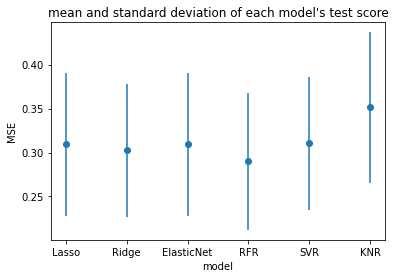

In [329]:
plt.errorbar([i for i in range(6)], m_score, s_score, fmt = "o")
plt.title("mean and standard deviation of each model's test score")
plt.xlabel('model')
plt.ylabel('MSE')
plt.xticks(np.arange(6), ['Lasso','Ridge','ElasticNet','RFR','SVR','KNR'])
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/result.png')
plt.show()

In [ ]:
prev_rst = [0.3092539131336592, 0.3023113954831187, 0.3092539131336592, 0.28988752913386095, 0.310398551698937]

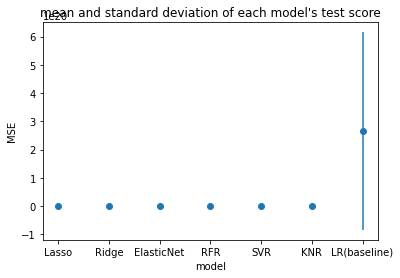

In [359]:
plt.errorbar([i for i in range(7)], m_score, s_score, fmt = "o")
plt.title("mean and standard deviation of each model's test score")
plt.xlabel('model')
plt.ylabel('MSE')
plt.xticks(np.arange(7), ['Lasso','Ridge','ElasticNet','RFR','SVR','KNR','LR(baseline)'])
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/result_baseline.png')
plt.show()

In [95]:
# init
test_scores = []
best_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    # split
    groups = df1['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)

    #preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)

    #
    pipe = make_pipeline(preprocessor,Lasso())
    
    param_grid = {'lasso__alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1]}
    
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'neg_root_mean_squared_error',
                         return_train_score = True, verbose = False)
        
    
    grid.fit(X_train, y_train)
    
    results = pd.DataFrame(grid.cv_results_)
    print('best model parameters:',grid.best_params_)
    print('validation score:',grid.best_score_)
    best_models.append(grid)
    y_test_pred = best_models[-1].predict(X_test)    
    test_score = np.sqrt(mean_squared_error(y_test,y_test_pred))
    test_scores.append(test_score)

    print("==========================================================")


======================random state 0======================
training set: (6828, 14)
training_prep set: (6828, 166)


Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py", line 763, in fit
    y_numeric=True)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py", line 763, in fit
    y_numeric=True)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py", line 763, in fit
    y_numeric=True)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py", line 763, in fit
    y_numeric=True)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/xiongfengwang/opt/anaconda3/envs/data1030/lib/python3.7/site-packages/sklearn/utils/validation.py", line 73

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## References

1. Gupta, L. (2019, February 03). Google Play Store Apps Dataset. Retrieved October 13, 2020, from https://www.kaggle.com/lava18/google-play-store-apps
2. Jemseow, J. (2018, September 27). Machine Learning to predict app ratings. Retrieved October 13, 2020, from https://www.kaggle.com/jemseow/machine-learning-to-predict-app-ratings
3. Siddiqi, S. (2018, September 28). Google Play Store Apps - Data Cleaning. Retrieved October 13, 2020, from https://www.kaggle.com/sabasiddiqi/google-play-store-apps-data-cleaning
4. Gupta, L. (2018, September 19). All that you need to know about the Android market. Retrieved October 13, 2020, from https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market
5. Jha, R. K. (2020, January 27). ML to Visualization &amp; Prediction of App Ratings. Retrieved October 13, 2020, from https://www.kaggle.com/rajeshjnv/ml-to-visualization-prediction-of-app-ratings

In [502]:
# init
test_scores = []
final_models = []
random_states = [i for i in range(10)]

for random_state in random_states:
    train_score = []
    val_score = []
    models = []
    
    # split
    groups = X['Genres']
    gss = GroupShuffleSplit(n_splits=10, train_size=.8, random_state=random_state)

    for train_idx, other_idx in gss.split(X, y, groups):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]

    groups1 = np.array(X_other['Genres'])
    gss1 = GroupShuffleSplit(n_splits=10, train_size=.5, random_state=random_state)

    for val_idx, test_idx in gss1.split(X_other, y_other, groups1):
        X_val = X_other.iloc[val_idx]
        y_val = y_other.iloc[val_idx]
        X_test = X_other.iloc[test_idx]
        y_test = y_other.iloc[test_idx]
    # print('training set:',X_train.shape, y_train.shape)
    # print('validation set:',X_val.shape, y_val.shape)
    # print('test set:',X_test.shape, y_test.shape)
    
    # missing value
    imp_mean = IterativeImputer(random_state=random_state)
    for j in [X_train, X_val, X_test]:
        temp = []
        temp1 = []
        for i in range(len(j)):
            temp.append([j.iloc[i].Size, j.iloc[i].Days])
        imp_mean.fit(temp)
        temp = imp_mean.transform(temp)
        for i in range(len(temp)):
            temp1.append(temp[i][0])
#         print(len(j.Size))
#         print(len(temp1))
        j.drop('Size', axis = 1,inplace=True)
#         print(j.info())
#         print(type(j.insert(loc=2, column='Size', value=temp1)))
        j.insert(loc=2, column='Size', value=temp1)
        
#         print(type(j))
#         j['Size'] = temp1
#         print(j.info())

    # preprocess
    ordinal_ftrs = ['Installs'] 
    ordinal_cats = [['1+', '5+', '10+', '50+', '100+',
                     '500+', '1,000+', '5,000+', '10,000+', '50,000+',
                     '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+',
                     '50,000,000+','100,000,000+', '500,000,000+', '1,000,000,000+']]
    onehot_ftrs = ['Category','Type','Content Rating','Android Ver','Genres']#,'Subcategory']
    std_ftrs = ['Reviews','Size','Price','Days']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    print("======================random state %d======================" %random_state)
    print('training set:', X_train.shape)
    print('training_prep set:', X_train_prep.shape)
    
#     print(X_train.info())
    #
#     reg = RandomForestRegressor()
    



    param_grid = {'max_depth': [10],
             'max_features': [0.5]}

    for i in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[i]
        reg = RandomForestRegressor(**params)
        reg.fit(X_train_prep, y_train)
        models.append(reg)
        y_train_pred = reg.predict(X_train_prep)
        train_score.append(mean_squared_error(y_train,y_train_pred))
        y_val_pred = reg.predict(X_val_prep)
        val_score.append(mean_squared_error(y_val,y_val_pred))

    
    print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score)])
    print('corresponding validation score:',np.min(val_score))

    final_models.append(models[np.argmin(val_score)])

    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores.append(mean_squared_error(y_test,y_test_pred))
    print('test score:',test_scores[random_state])

    print("==========================================================")




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 0======================
training set: (6828, 10)
training_prep set: (6828, 166)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.3183404277236526
test score: 0.2796621320004651



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 1======================
training set: (6016, 10)
training_prep set: (6016, 160)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.28843845844326416
test score: 0.19255469954418655



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 2======================
training set: (6843, 10)
training_prep set: (6843, 164)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.11143767615758092
test score: 0.2501440021963617



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 3======================
training set: (6988, 10)
training_prep set: (6988, 167)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.2328447210234402
test score: 0.2365437188814374



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 4======================
training set: (6476, 10)
training_prep set: (6476, 163)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.2481186591961851
test score: 0.40446860679786656



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 5======================
training set: (7172, 10)
training_prep set: (7172, 168)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.3185134133970894
test score: 0.27971164884835825



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 6======================
training set: (6204, 10)
training_prep set: (6204, 164)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.2239414431989667
test score: 0.28779197087391784



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 7======================
training set: (6653, 10)
training_prep set: (6653, 162)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.3155239649274752
test score: 0.16659222595015066



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 8======================
training set: (7226, 10)
training_prep set: (7226, 168)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.2930971380042539
test score: 0.28297462446984256



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


======================random state 9======================
training set: (6569, 10)
training_prep set: (6569, 165)
best model parameters: {'max_features': 0.5, 'max_depth': 10}
corresponding validation score: 0.22628078128676885
test score: 0.4053968477045378


In [497]:
reg = RandomForestRegressor(max_depth=0.5, max_features=10)


In [498]:
reg.fit(X_train_prep, y_train.values.ravel())
y_test_pred =reg.predict(X_test_prep)

In [487]:
reg = Lasso()

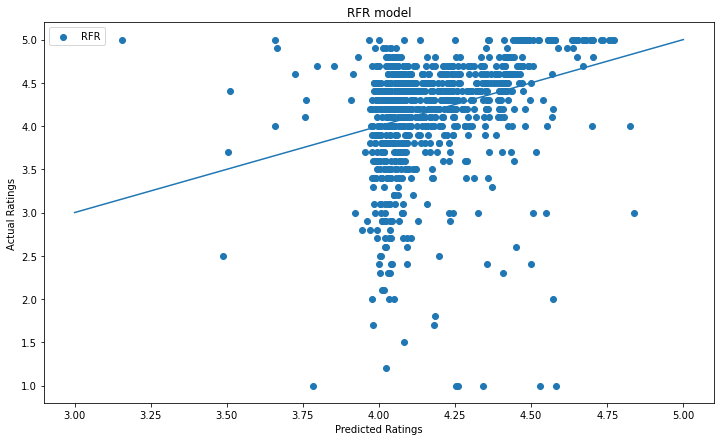

In [515]:
plt.figure(figsize=(12,7))
plt.scatter(y_test_pred,y_test, label = 'RFR')
plt.legend()
plt.title('RFR model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.plot(np.linspace(3, 5, 200), np.linspace(3, 5, 200))
plt.savefig('/Users/xiongfengwang/git/local/1030project/figures/result_scatter.png')


plt.show()

In [444]:
ftr_names = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Android Ver', 'Days']

In [464]:
df_test = pd.DataFrame(data=X_test_prep)
df_test

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.127355,-0.120682,-0.05528,-0.660727
1,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.171257,-0.151386,-0.05528,-0.492972
2,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.434231,-0.118927,-0.05528,-0.670313
3,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.096045,0.278295,-0.05528,-0.629573
4,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.119894,-0.158842,-0.05528,-0.452232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.134655,-0.366080,-0.05528,-0.682296
879,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.134482,1.705124,-0.05528,-0.353975
880,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.134646,0.140215,-0.05528,-0.382733
881,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.134612,-0.904593,-0.05528,-0.437853


In [465]:
np.random.seed(42)
nr_runs = 10
scores1 = np.zeros([len(ftr_names),nr_runs])

print('test score = ',mean_squared_error(y_test,y_test_pred))
# print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    mse_scores = []
    for j in range(nr_runs):
        X_test_shuffled = df_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(df_test[ftr_names[i]].values)
        y_pred_shuffled = reg.predict(X_test_shuffled)
#         mse_scores.append(mean_squared_error(y_test, y_pred_shuffled))
    print('   shuffled test score:',np.around(np.mean(mse_scores),3),'+/-',np.around(np.std(mse_scores),3))
    scores1[i] = mse_scores 

test score =  0.4404072774016551
shuffling Category


KeyError: 'Category'

In [461]:
X_test_prep

array([[14.        ,  0.        ,  0.        , ..., -0.12068165,
        -0.0552797 , -0.66072725],
       [15.        ,  0.        ,  0.        , ..., -0.15138561,
        -0.0552797 , -0.49297228],
       [14.        ,  0.        ,  0.        , ..., -0.11892713,
        -0.0552797 , -0.67031325],
       ...,
       [ 7.        ,  0.        ,  0.        , ...,  0.1402145 ,
        -0.0552797 , -0.38273329],
       [ 8.        ,  0.        ,  0.        , ..., -0.90459292,
        -0.0552797 , -0.43785279],
       [ 4.        ,  0.        ,  0.        , ..., -0.08991929,
        -0.0552797 , -0.54569527]])